# EDA-数据探索性分析
数据探在机器学习中一般称为EDA（Exploratory Data Analysis）
> 是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

## 一、读取数据并查看数据集信息
pandas中含有很多读取数据的方法，可以读取csv，xls等多种类型的数据集。读入的数据以Dataframe的方式存储。
通过调用head和tail属性可以帮助查看数据集的前5条和后5条数据。
Shape方法能了解数据集的维数信息，方便后续操作。

In [2]:
## 1)读取数据集
Train_data=pd.read_csv('used_car_train_20200313.csv',sep=' ')
Test_data=pd.read_csv('used_car_testA_20200313.csv',sep=' ')

In [4]:
## 2)简略观察数据
Train_data.head().append(Train_data.tail())  ##查看数据的前5行和后5行

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [5]:
Train_data.shape  #查看数据行数和列数

(150000, 31)

In [6]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [7]:
Test_data.shape

(50000, 30)

## 二、纵览数据概况
接下来要对数据集的内容进行深入探索。即对每一列的属性，数值范围进行了解。通过Dataframe的<b>describe</b>方法可以了解各数值列的数据数目(count)，标准差(std)，均值(mean)，最小值(min)，最大值(max)，分位点(25%,50%,75%)等信息。而通过<b>info</b>方法主要是了解各列的数据类型，特别是非数值型数据。

In [9]:
##1) 了解数据相关统计量
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [10]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [11]:
## 2）通过info（）熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [12]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

## 三、缺失值和异常的处理
如果不对数据的缺失值进行处理，在进行模型训练的时候就会报错，一般而言，如果缺失值较少的话，则可以直接删除，不过，如果缺失的属性十分关键，则采取删除的方法容易丢失信息，还可以利用均值，最值，临近值，机器学习等方法对空值进行填充，保证数据集数据的完整性。


In [13]:
## 1) 查看每列的存在nan情况
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [14]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

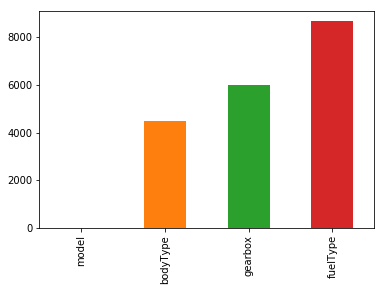

In [15]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

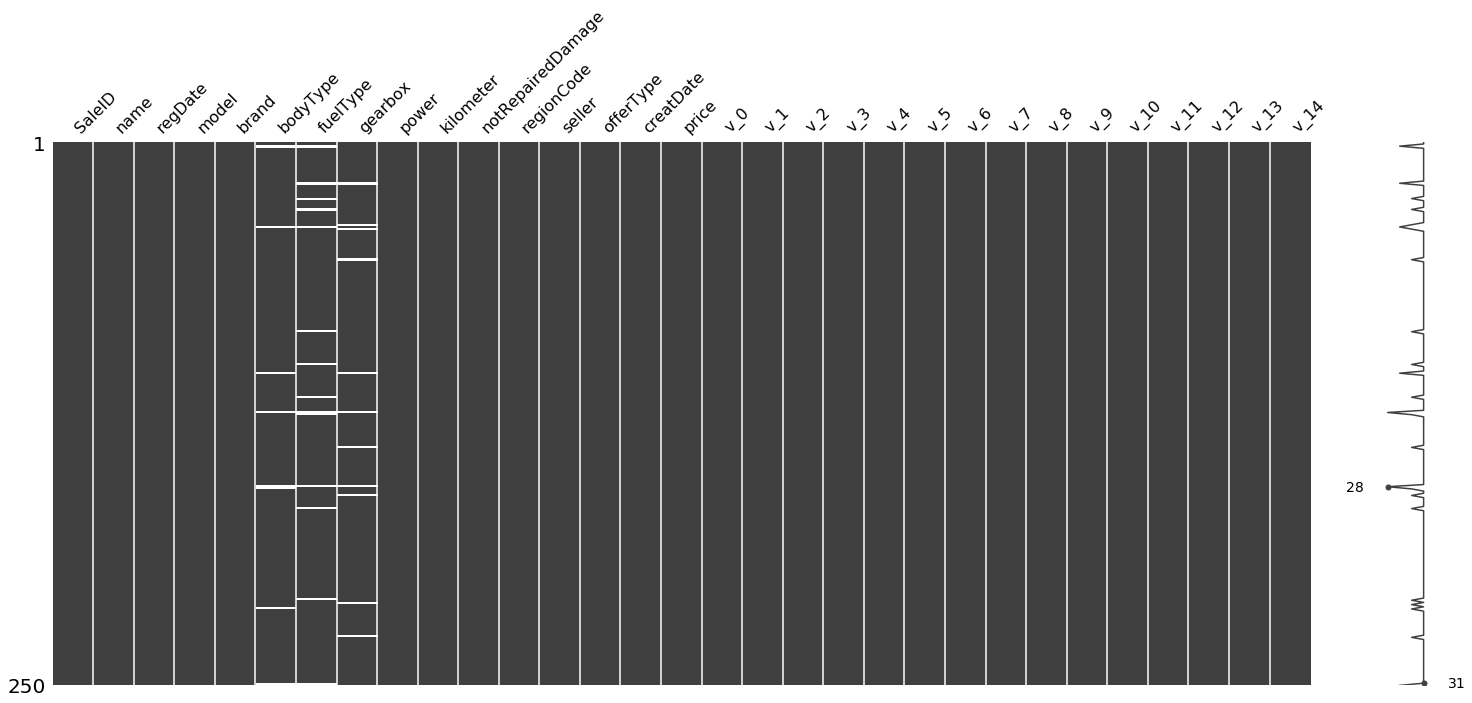

In [17]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

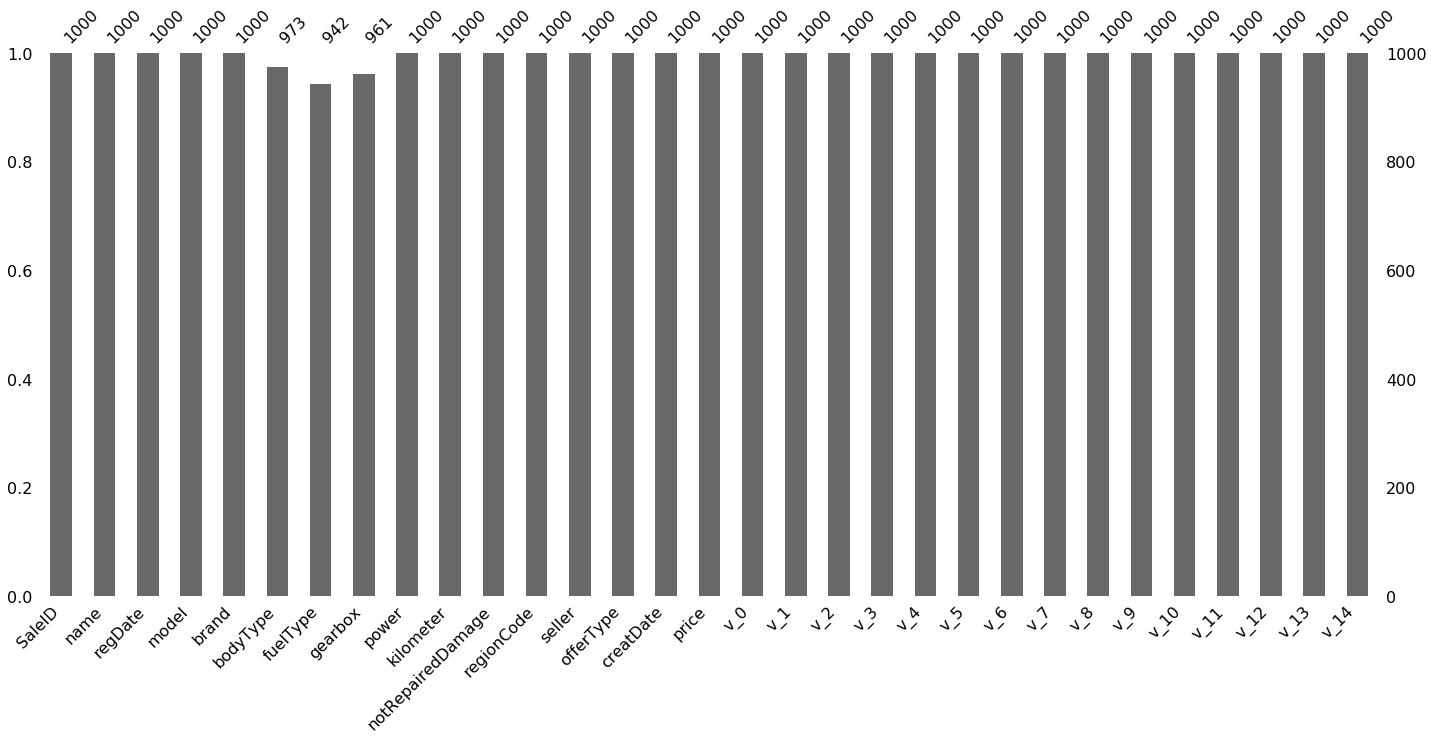

In [18]:
msno.bar(Train_data.sample(1000))

In [19]:
## 2) 查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [20]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [21]:
## 将- 替换为NAN，因为很多模型对NAN有处理
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [22]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [23]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [24]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [25]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [26]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

会发现在Seller和offertype特征中，出现了严重的数据倾斜，对于研究意义不大。

In [27]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [28]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

## 四、了解预测值的分布
在训练数据中，特别是预测任务，样本最好是均衡的，严重的有偏分布会影响结果的准确性。
这里需要做的工作是将数据转换成正态分布，

> 偏度（skewness）是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，简单来说就是数据的不对称程度。

（1）Skewness = 0 ，分布形态与正态分布偏度相同。

（2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。

（3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。

（4）数值的绝对值越大，表明数据分布越不对称，偏斜程度大。

> 峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的尖锐程度。

（1）Kurtosis=0 与正态分布的陡缓程度相同。

（2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

（3）Kurtosis<0 比正态分布的高峰来得平台——平顶峰


In [29]:
Train_data['price']

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [30]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

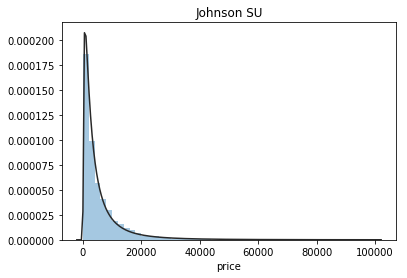

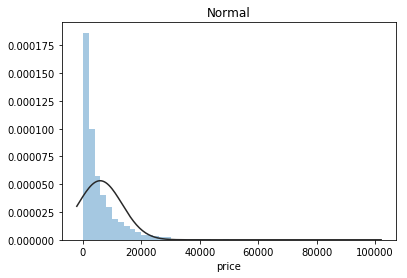

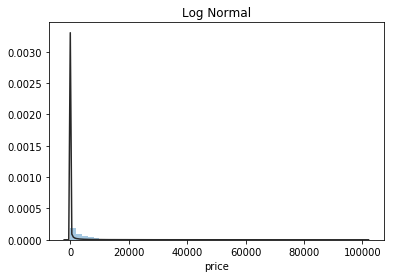

In [31]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 3.346487
Kurtosis: 18.995183


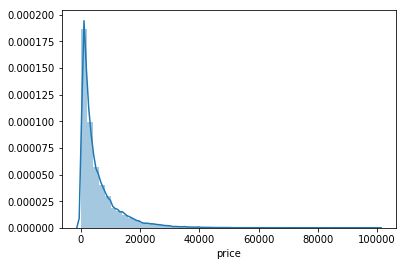

In [32]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

In [33]:
Train_data.skew(), Train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

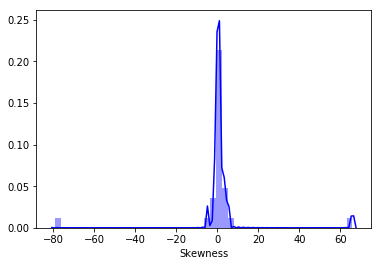

In [34]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

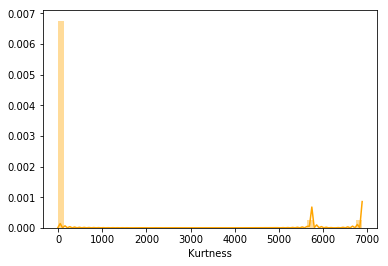

In [35]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

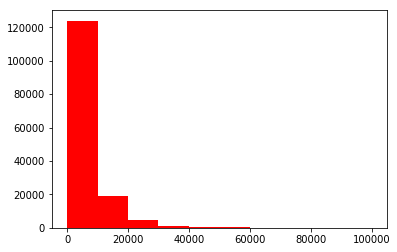

In [36]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

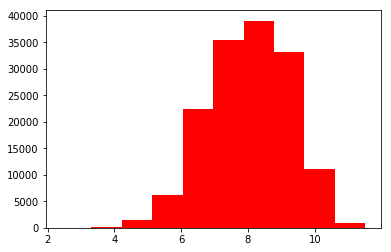

In [37]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

## 五、研究类别特征
特征分为类别特征和数字特征，并对类别特征查看unique分布¶

In [38]:
# 分离label即预测值
Y_train = Train_data['price']

In [39]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [40]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445

In [41]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55        97
708       96
387       95
1541      88
713       74
53        72
1186      67
203       67
631       65
911       64
2044      62
2866      60
1139      57
893       54
1180      52
2765      50
1108      50
290       48
1513      47
691       45
473       44
299       43
444       41
422       39
964       39
1479      38
1273      38
306       36
725       35
4635      35
          ..
46786      1
48835      1
165572     1
68204      1
171719     1
59080      1
186062     1
11985      1
147155     1
134869     1
138967     1
173792     1
114403     1
59098      1
59144      1
40679      1
61161      1
128746     1
55022      1
143089     1
14066      1
147187     1
112892     1
46598      1
159481     1
22270      1
89855      1
42752      1
48899      1
11808      1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
48.0     1685
26.0     1525
40.0   

## 六、数字特征分析


In [43]:
numeric_features.append('price')

In [44]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [45]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [46]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



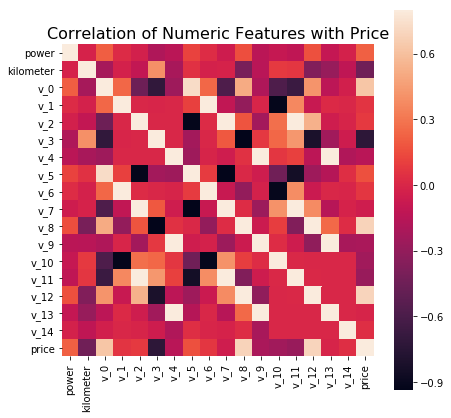

In [47]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [48]:
del price_numeric['price']

In [49]:
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


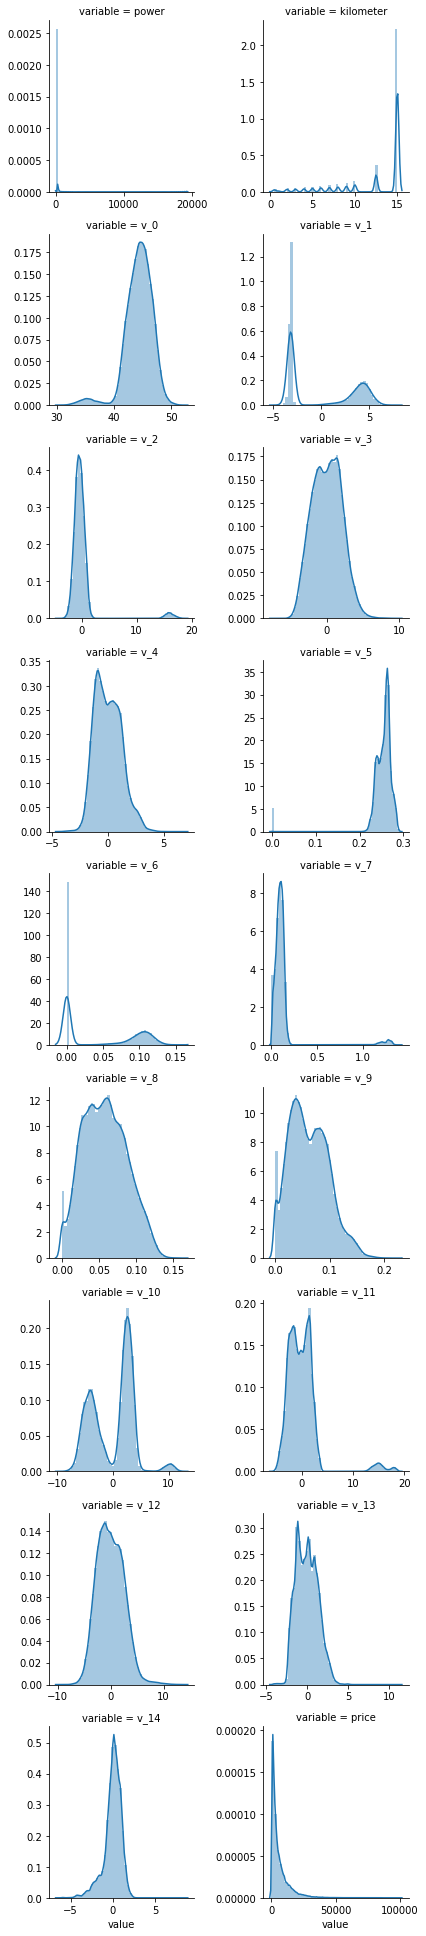

In [50]:
## 3) 每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

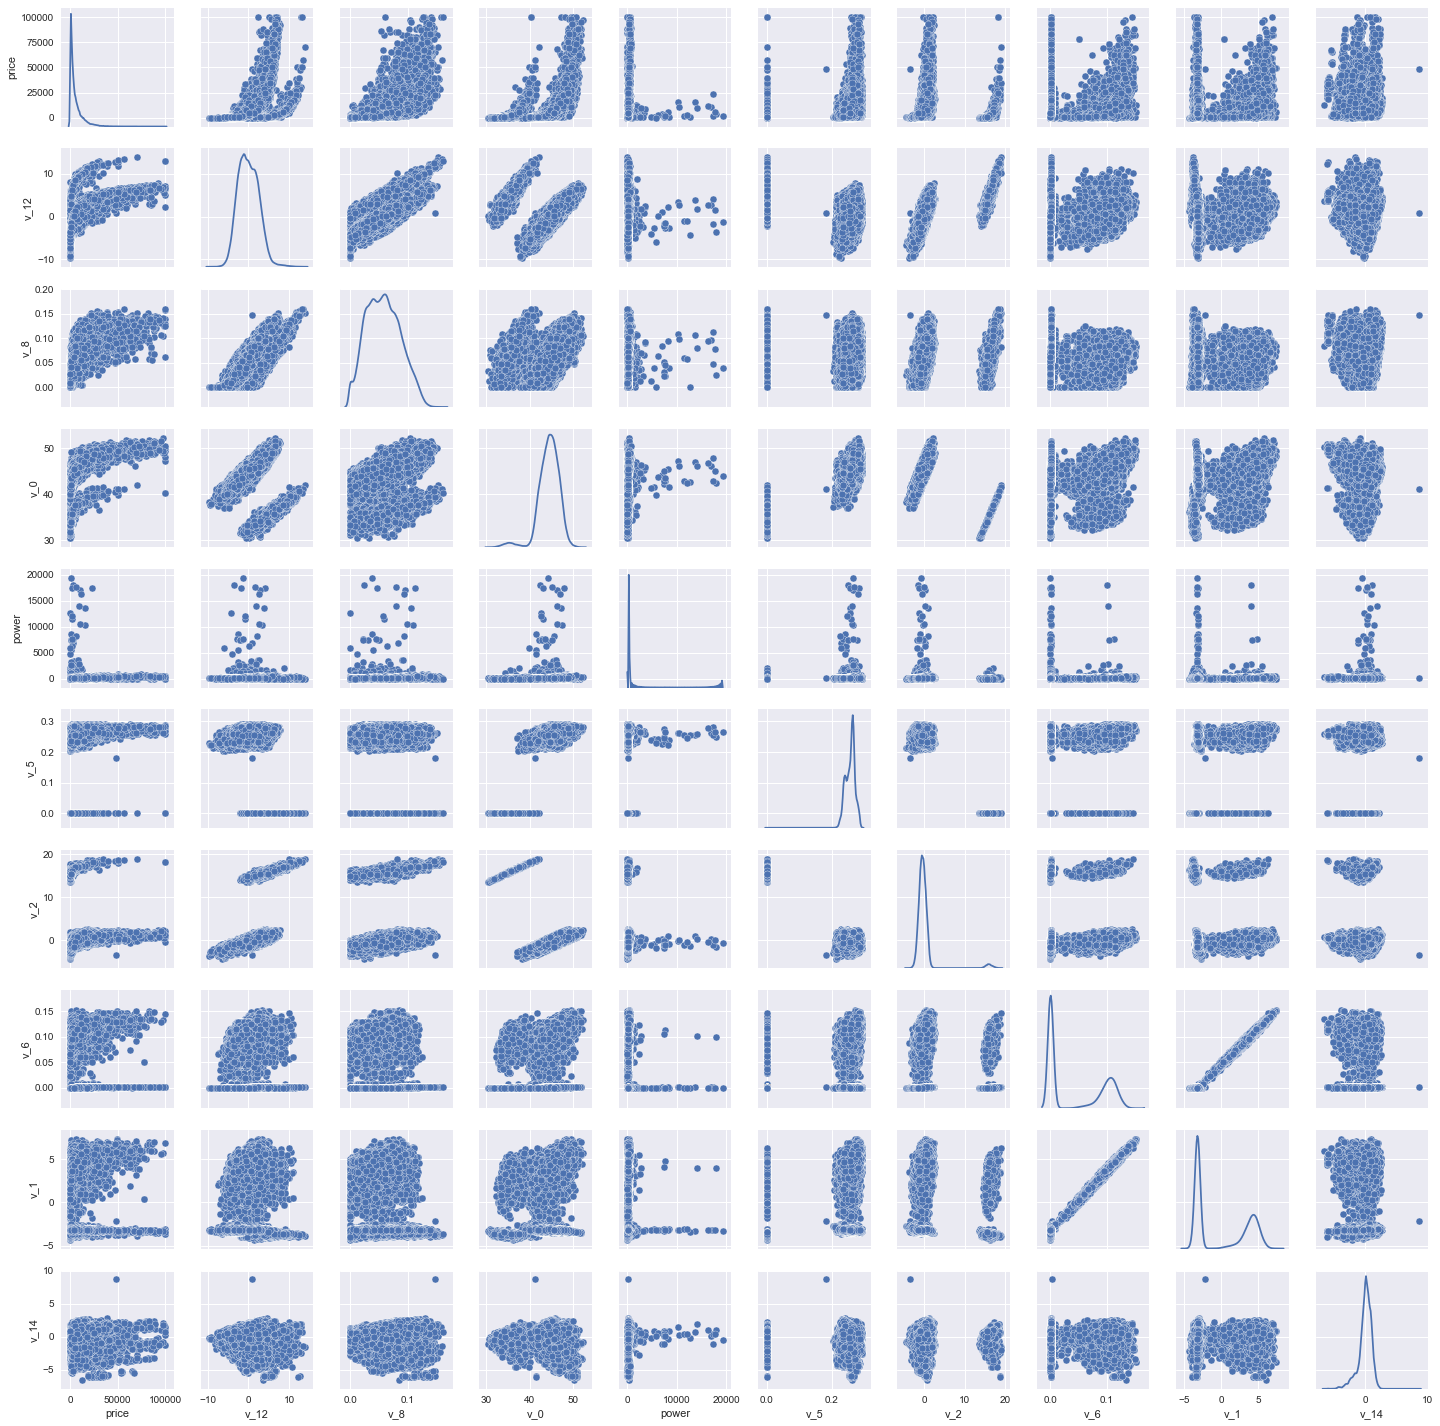

In [51]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

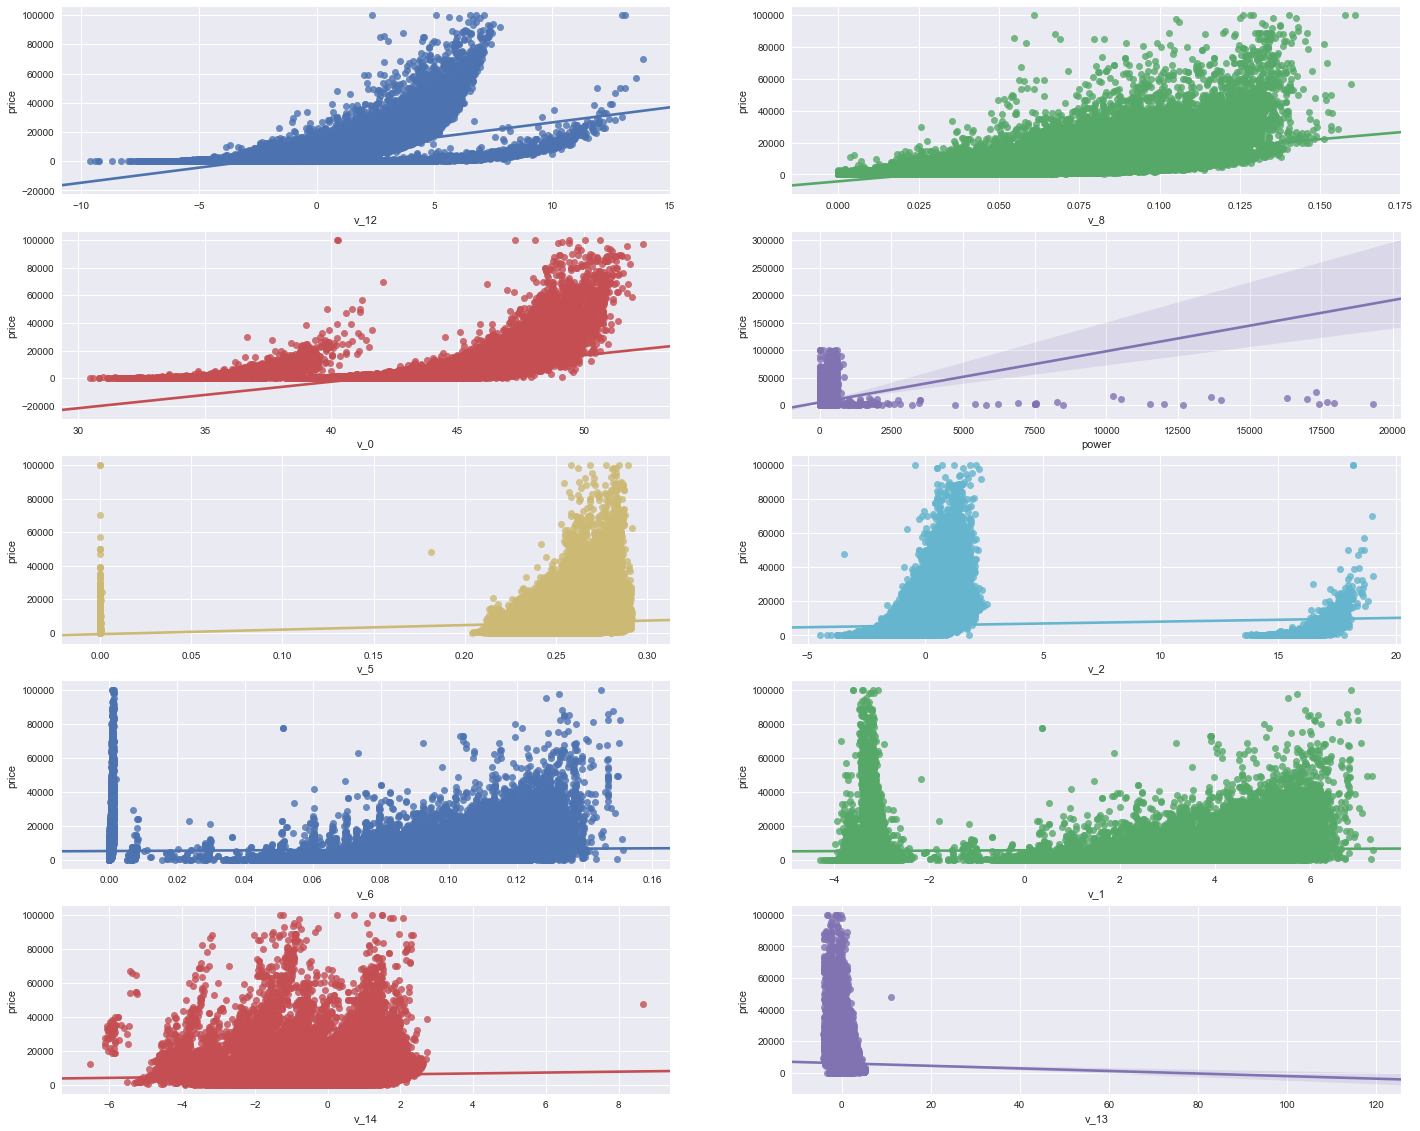

In [52]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

## 七、类别特征分析


In [53]:
## 1) unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [54]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

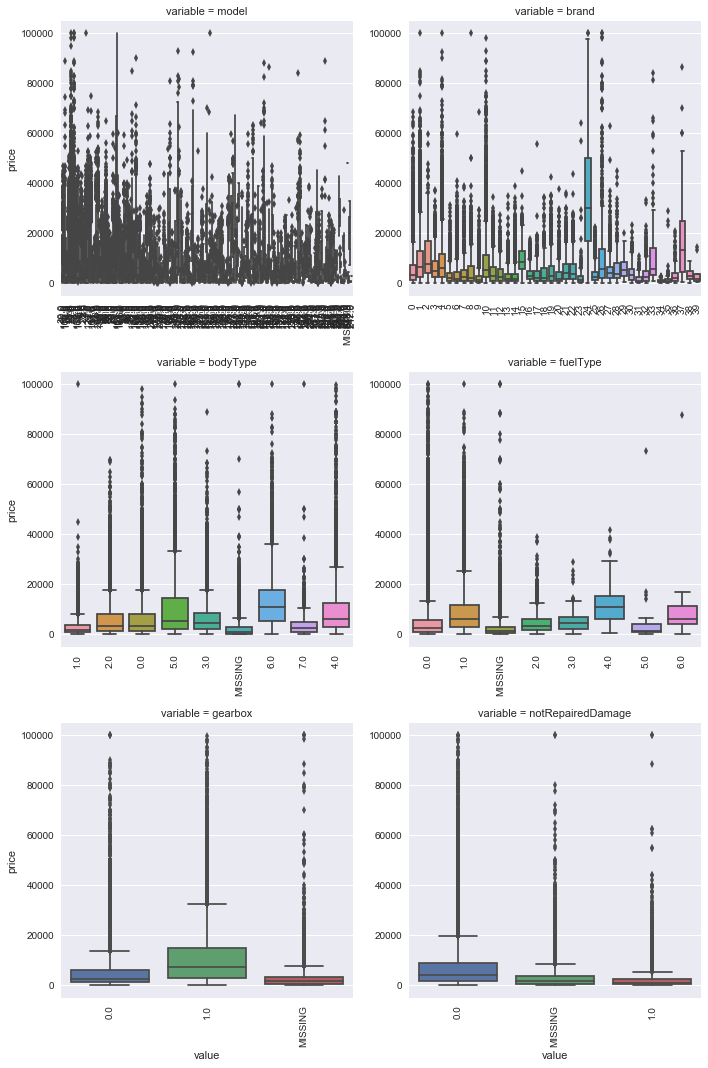

In [55]:
## 2) 类别特征箱形图可视化
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [56]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

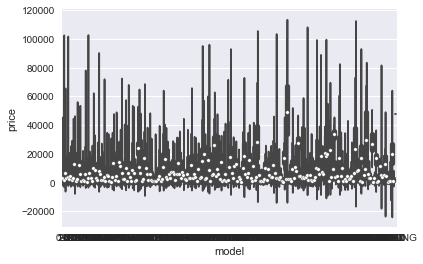

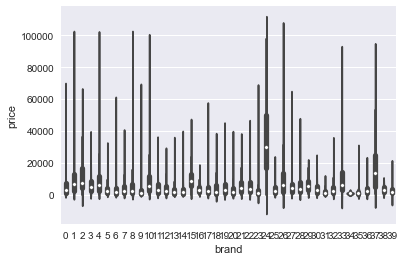

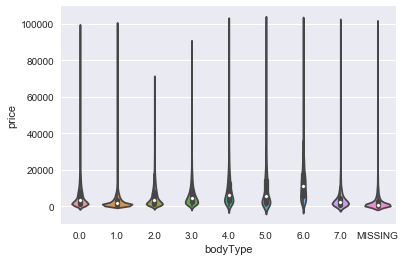

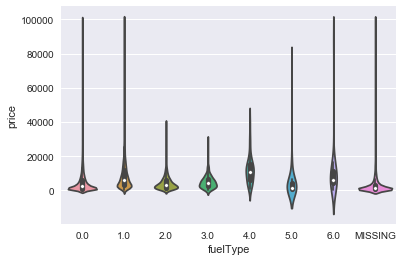

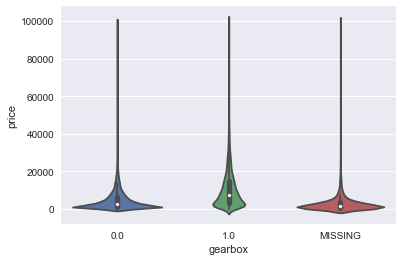

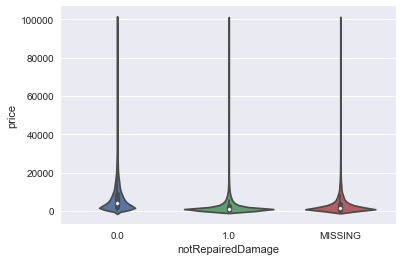

In [57]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

In [58]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

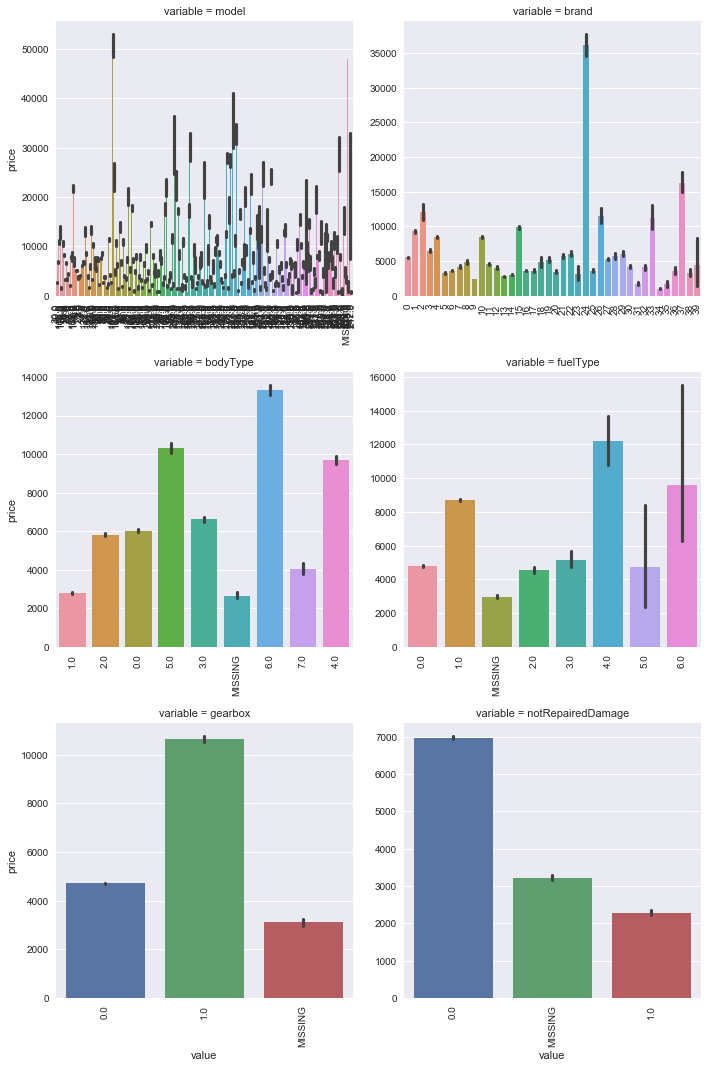

In [59]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

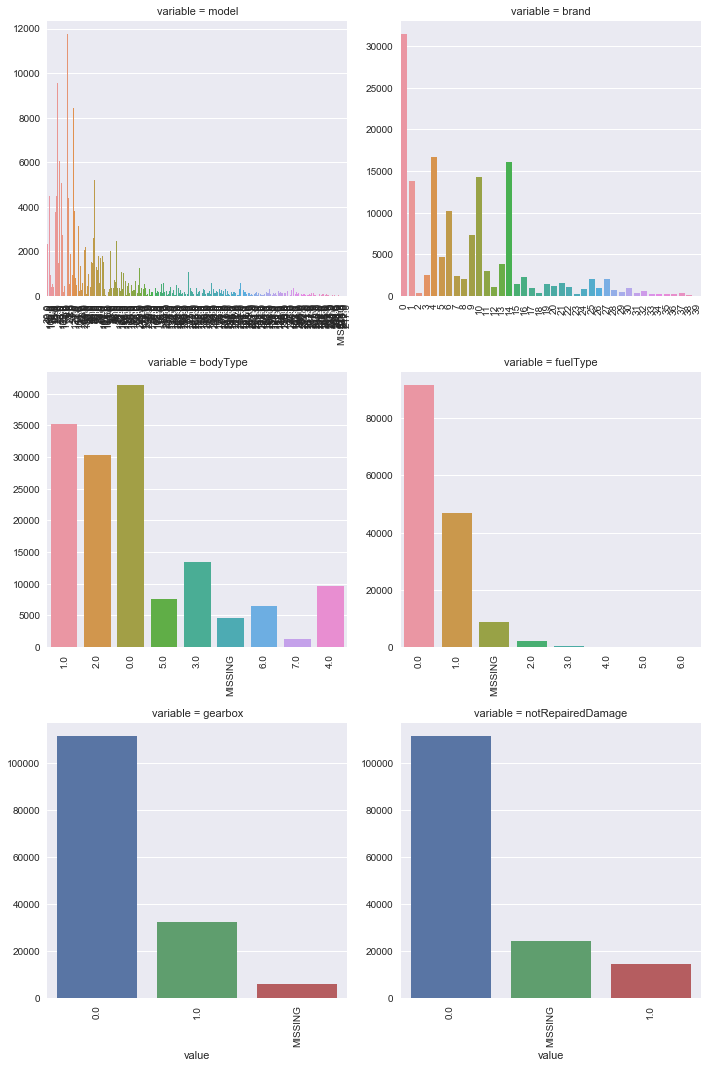

In [60]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

In [62]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'